In [1]:
import numpy as np
dat = np.load('211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00001xy0c1_seg.npy', allow_pickle=True).item()

In [1]:
!which python

/Users/sherryyang/miniconda3/envs/omnipose/bin/python


In [3]:
!conda activate omnipose


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [2]:
import numpy as np
from cellpose_omni import plot
dat = np.load('211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00001xy0c1_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'],
                        colors=np.array(dat['colors']))

# plot image with outlines overlaid in red
outlines = plot.outlines_list(dat['masks'])
plt.imshow(dat['img'])
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

KeyError: 'colors'

In [ ]:
dat['flows'][1]

In [ ]:
dat

In [ ]:
len(dat['flows'][-1][0])

In [ ]:
len(dat['flows'][-1][0][0])

In [ ]:
len(dat['flows'][1][0])

In [ ]:
len(dat['flows'][1][0][0])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(dat['flows'][1][0] )

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(dat['flows'][-1][0],cmap='Blues')

In [ ]:
plt.imshow?

In [3]:
gradients = np.gradient(dat['flows'][-1][0])

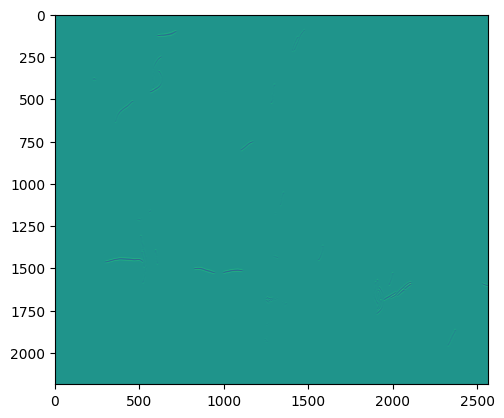

In [7]:
plt.imshow(gradients[0])

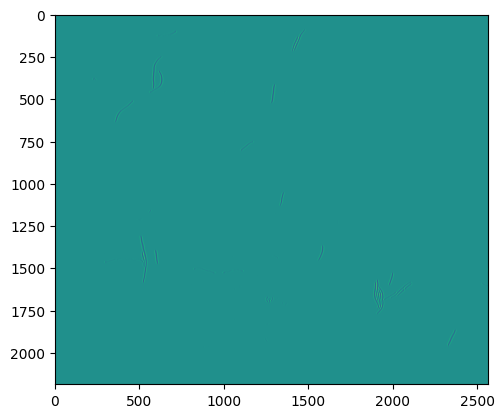

In [4]:
gradientsy = np.gradient(dat['flows'][-1][1])
plt.imshow(gradientsy[1])

In [5]:
gradient_total = gradientsy[1] + gradients[0]

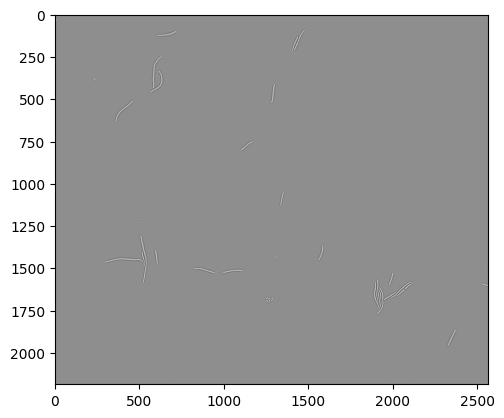

In [10]:
plt.imshow(gradient_total,cmap='Greys')

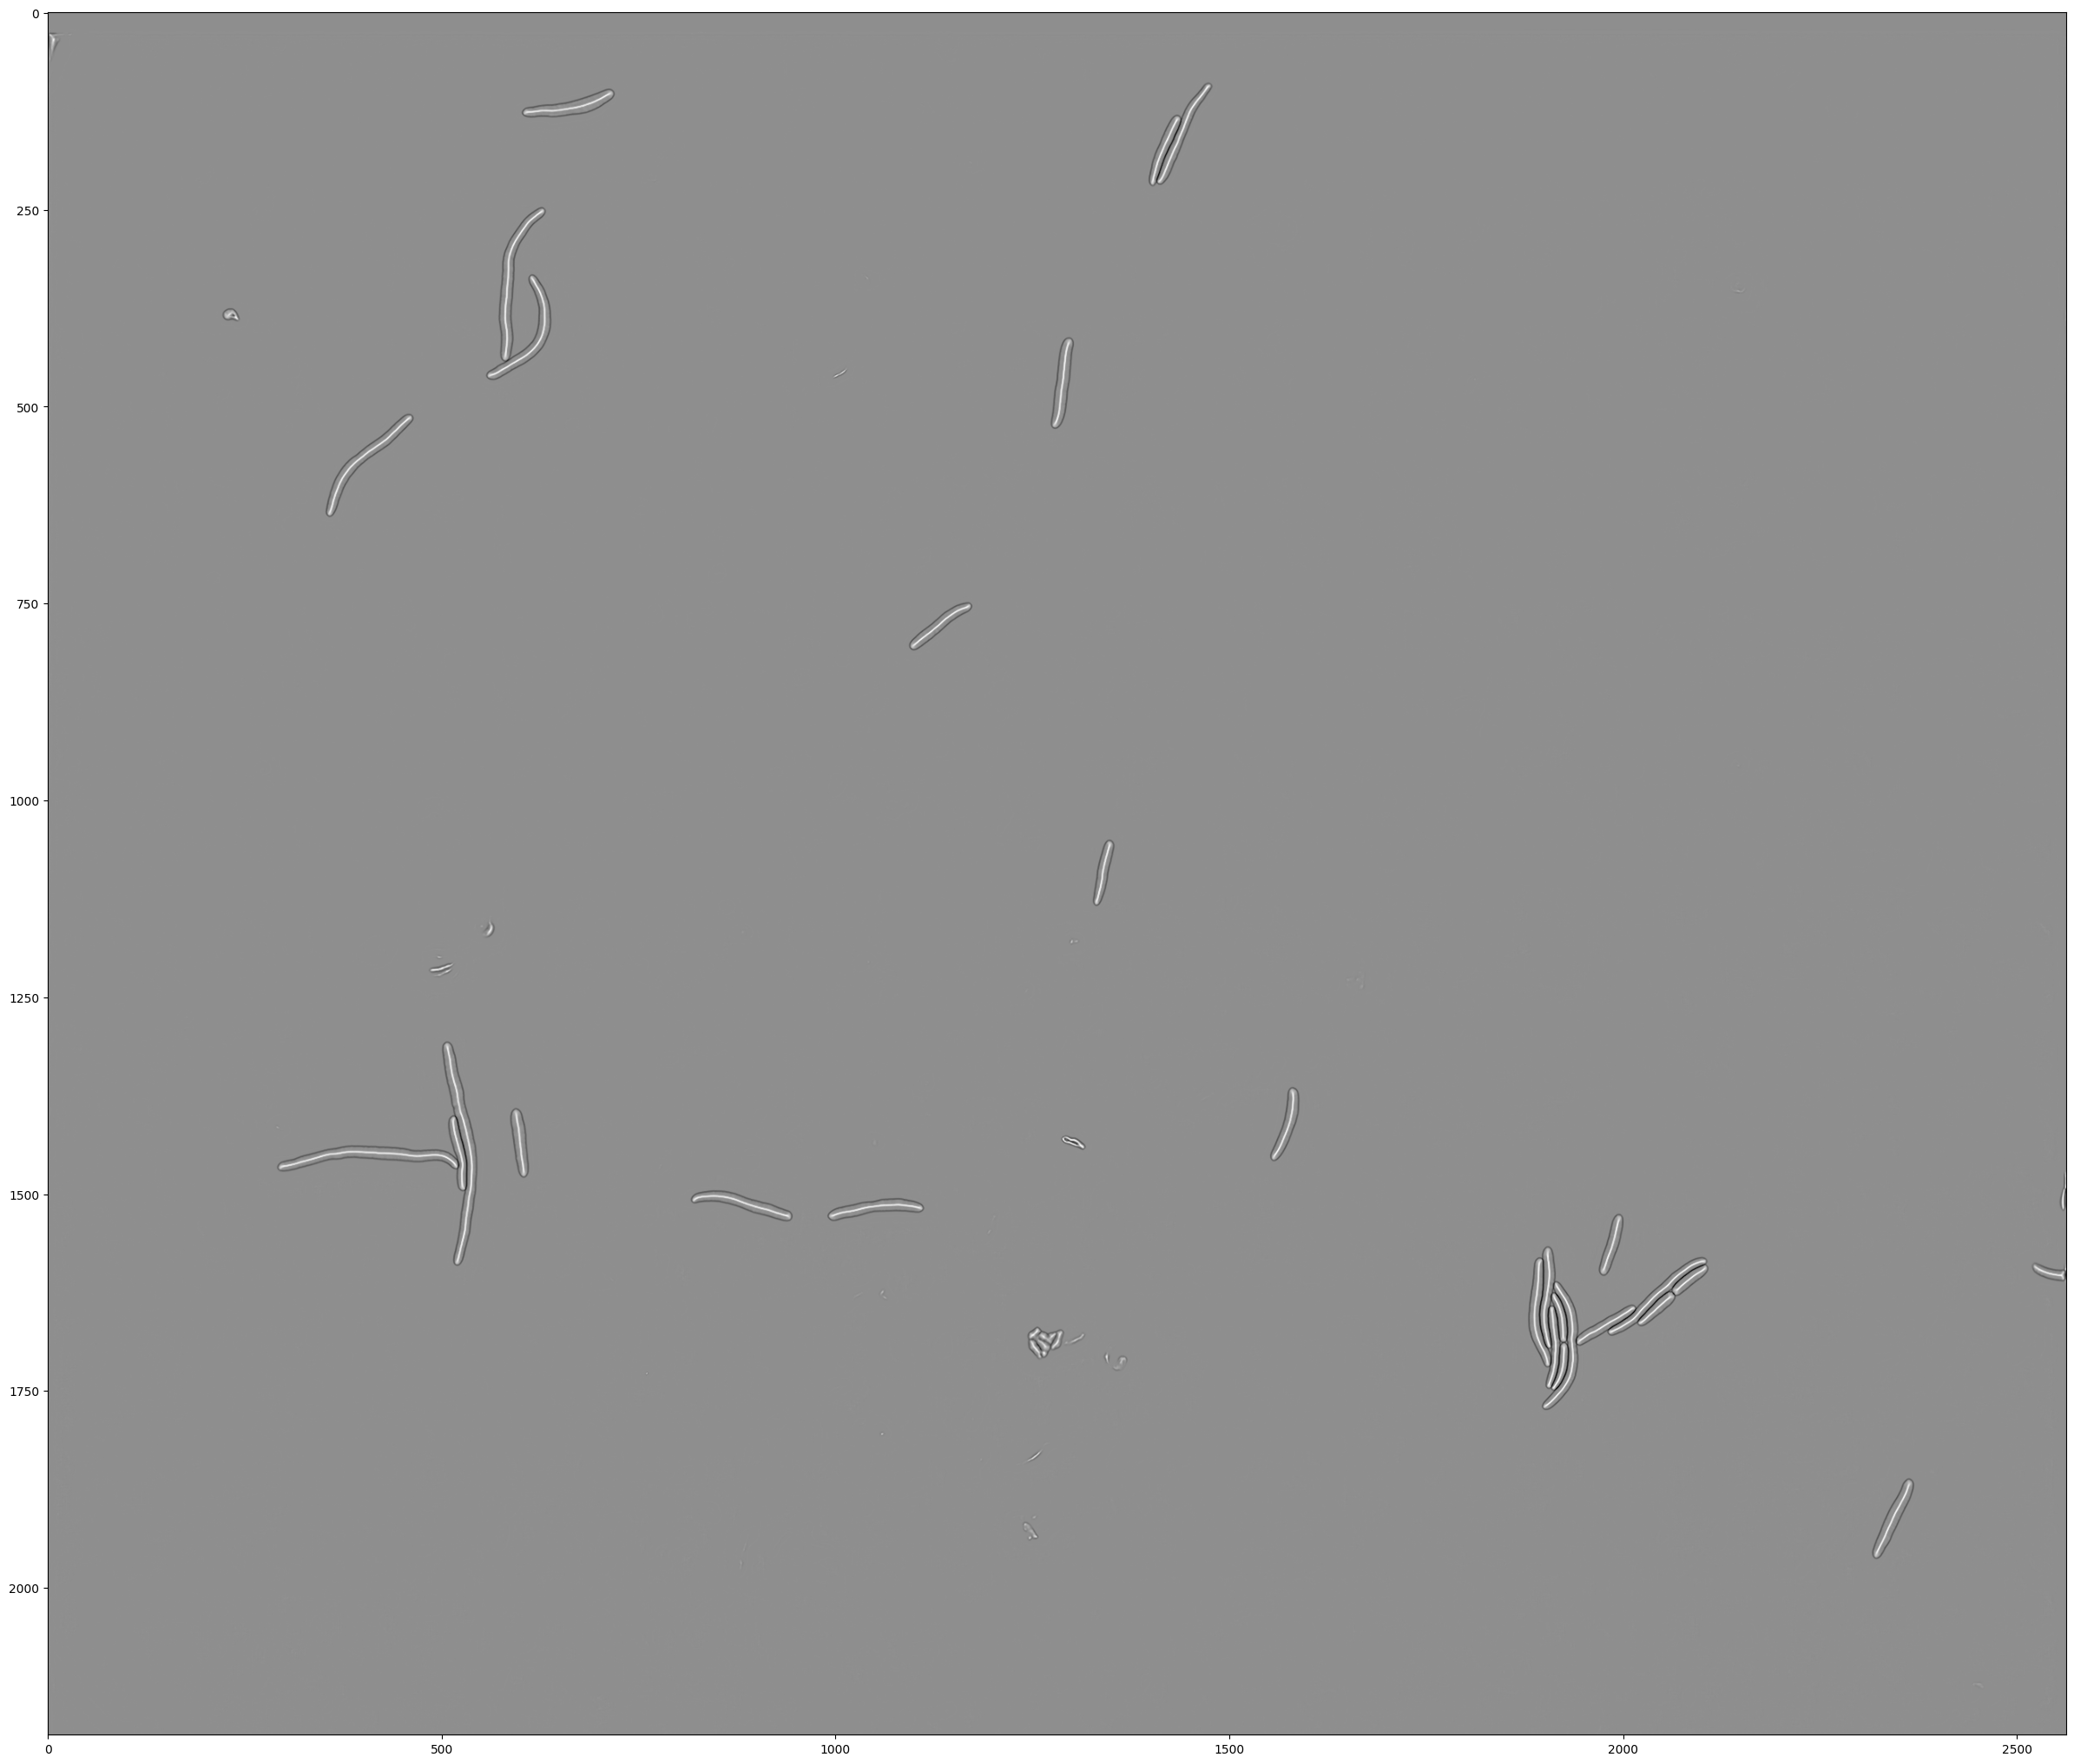

In [12]:
fig = plt.figure(figsize=(30, 30))
plt.imshow(gradient_total,cmap='Greys')

In [ ]:
plt.imshow?

In [ ]:
np.min(dat['flows'][-1][2])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(dat['flows'][-1][1])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(dat['flows'][-1][2])

In [ ]:
len(dat['flows'][0][0])

In [57]:
!which python

python not found


In [4]:
import scipy.io
mat = scipy.io.loadmat('regs_label.mat')

ModuleNotFoundError: No module named 'scipy'

In [54]:
!which python

python not found


In [ ]:
mat

In [14]:
regs_label = mat['regs'][0][0][0]

In [ ]:
plt.imshow(regs_label)

In [ ]:
# Apply the mask to the array
masked_regs_label= np.ma.masked_array(regs_label, 42)

# Print the masked array
print(masked_regs_label)

In [ ]:
plt.imshow(masked_regs_label)

In [ ]:
np.max(regs_label)

In [ ]:
np.max(masked_regs_label)

In [ ]:
y = np.ma.array(gradient_total, mask = masked_regs_label)
plt.imshow(y)

In [ ]:
plt.imshow(y)

In [ ]:
masked = regs_label == 42

In [ ]:
masked

In [ ]:
fig = plt.figure(figsize=(30, 30))
y = np.ma.array(gradient_total * masked)
image = plt.imshow(y, cmap='Greys')
plt.scatter(2347, 1903, c='red', marker='o')
# Add a colorbar to the plot
plt.colorbar(image)

# Show the plot
plt.show()

In [ ]:
np.min(y)

In [ ]:
indices = np.where(y == np.min(y))

In [ ]:
indices

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


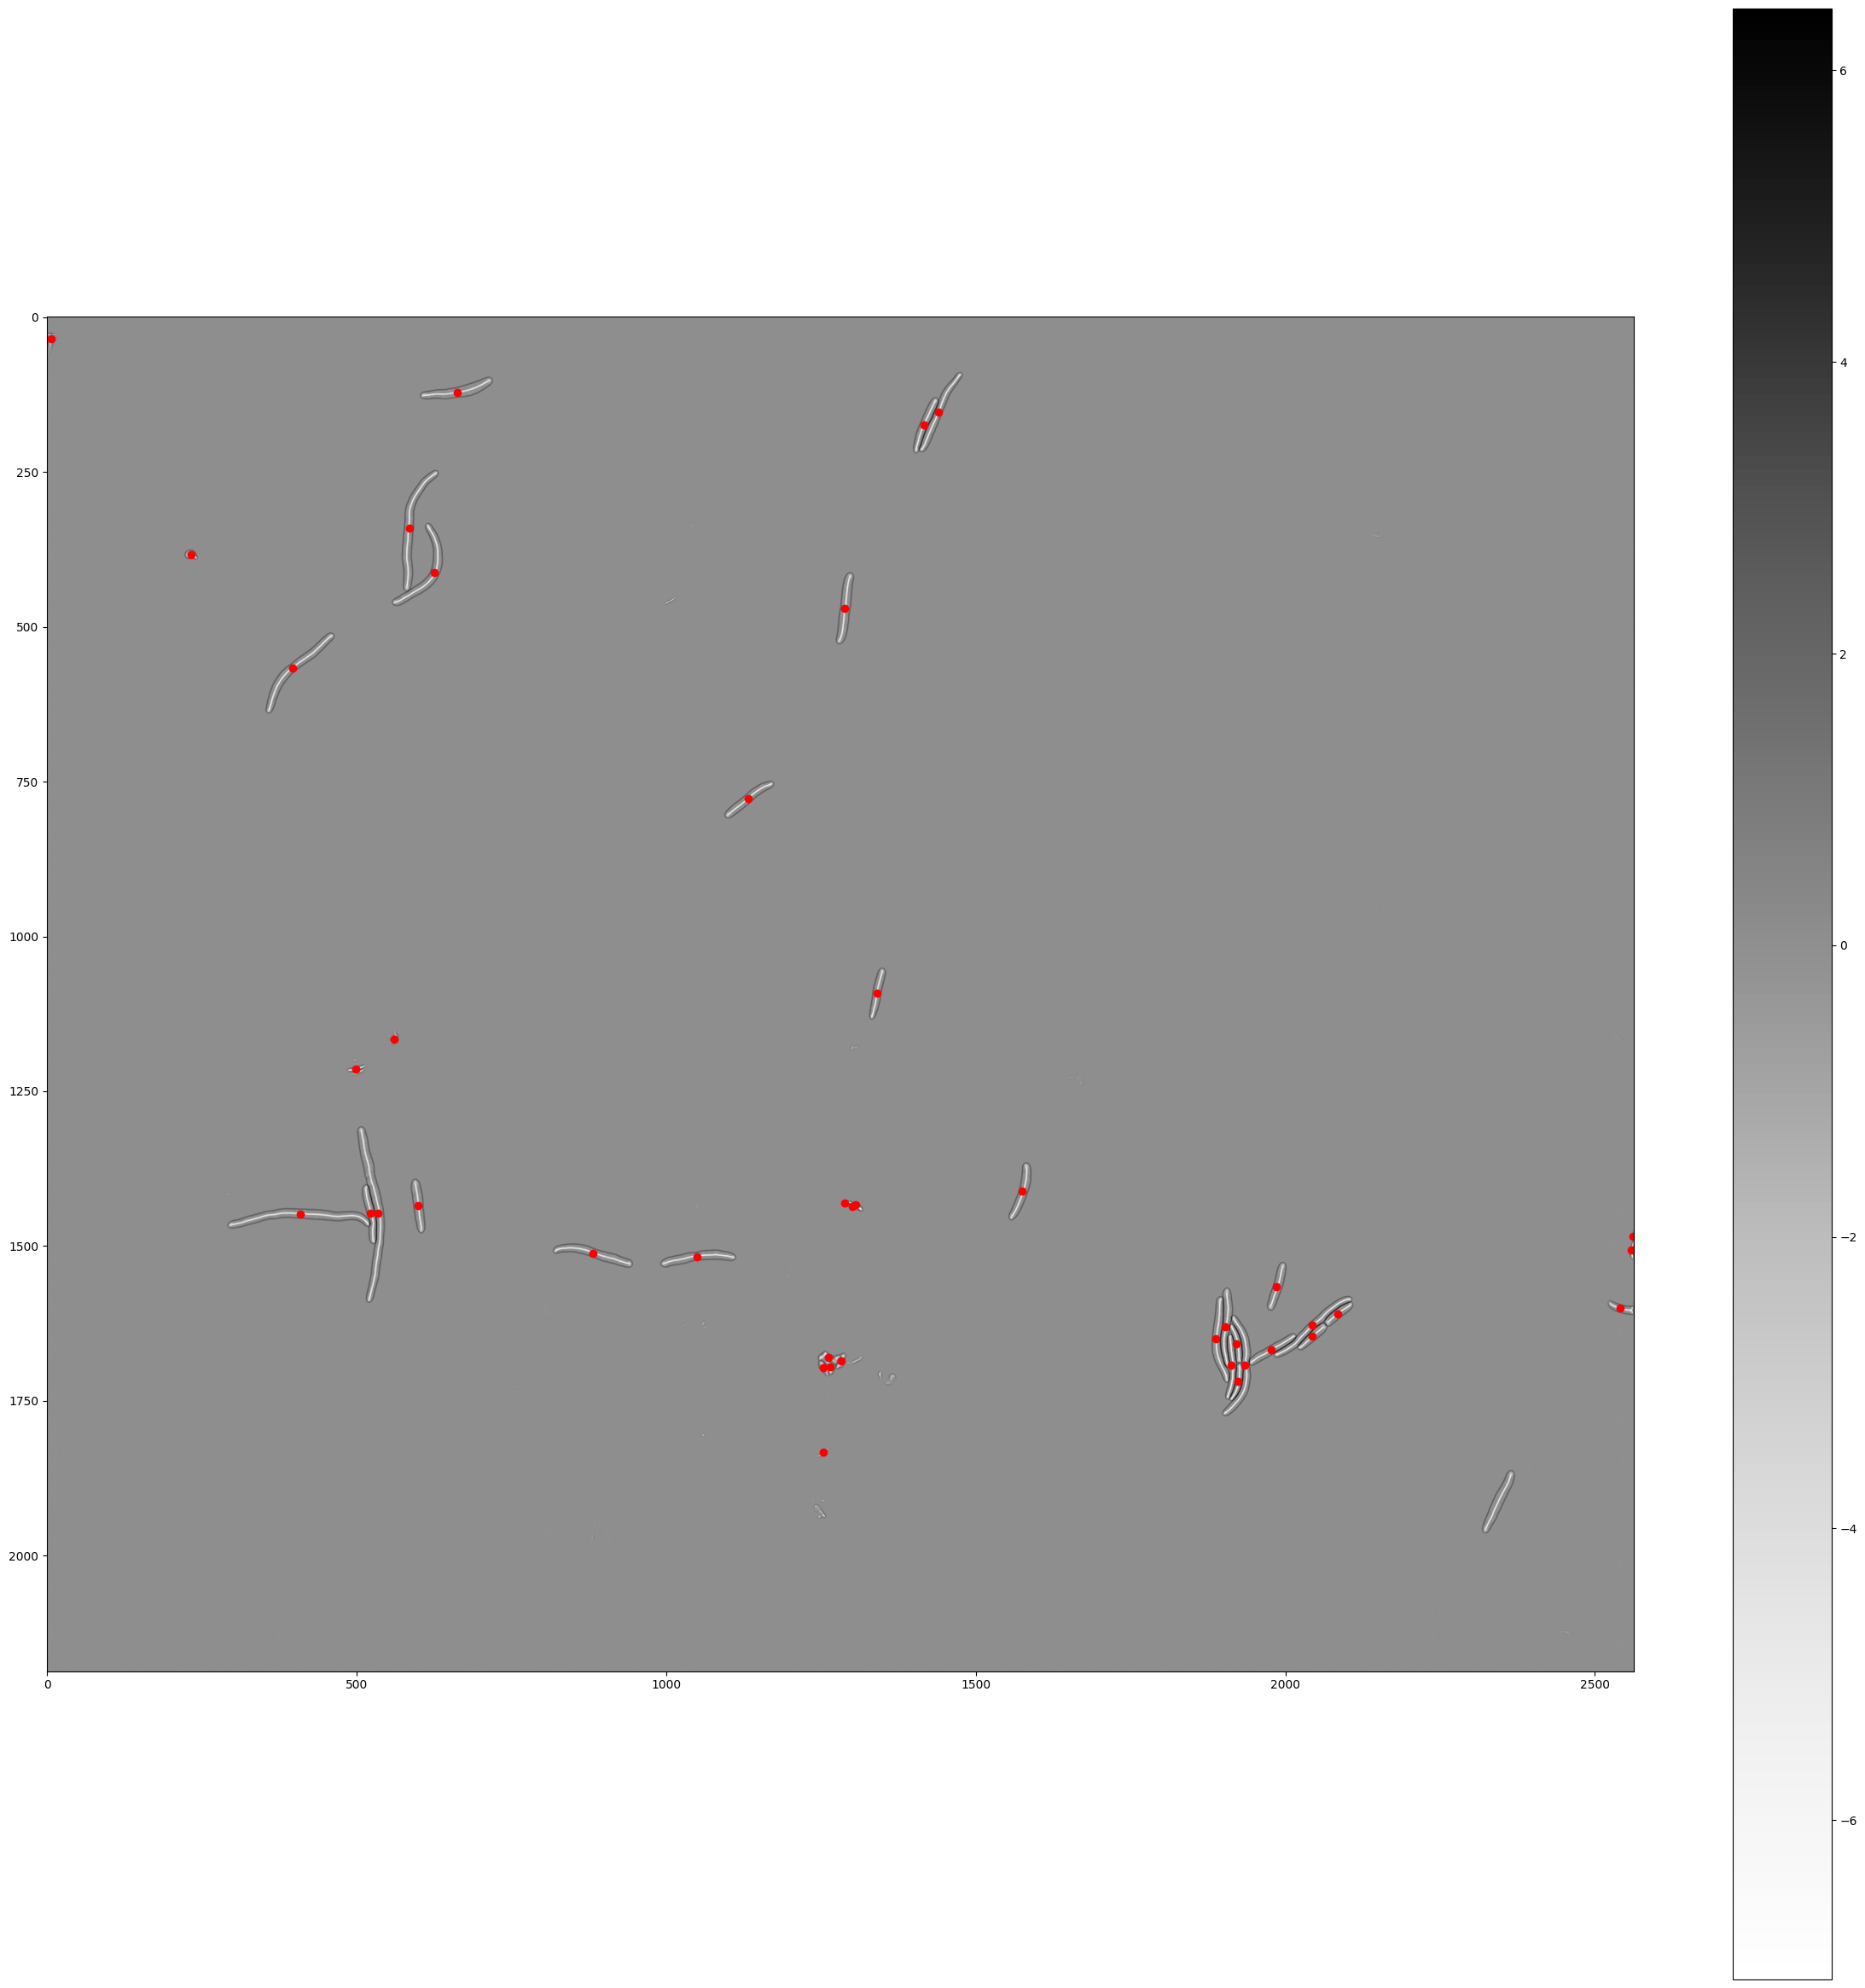

In [17]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys')

for i in range(42):
    print(i)
    masked = (regs_label == i) & (gradient_total < -1)
    y = np.ma.array(gradient_total * masked)
    row_indices, col_indices = np.where(y < 0)
    x_center = np.mean(row_indices)
    y_center = np.mean(col_indices)
    distances = np.sqrt((row_indices - x_center)**2 + (col_indices - y_center)**2)
    closest_index = np.argmin(distances)
    closest_point = (row_indices[closest_index], col_indices[closest_index])
    plt.scatter(closest_point[1], closest_point[0], c='red', marker='o')

plt.colorbar(image)
plt.show()

In [ ]:
indices[1][0]

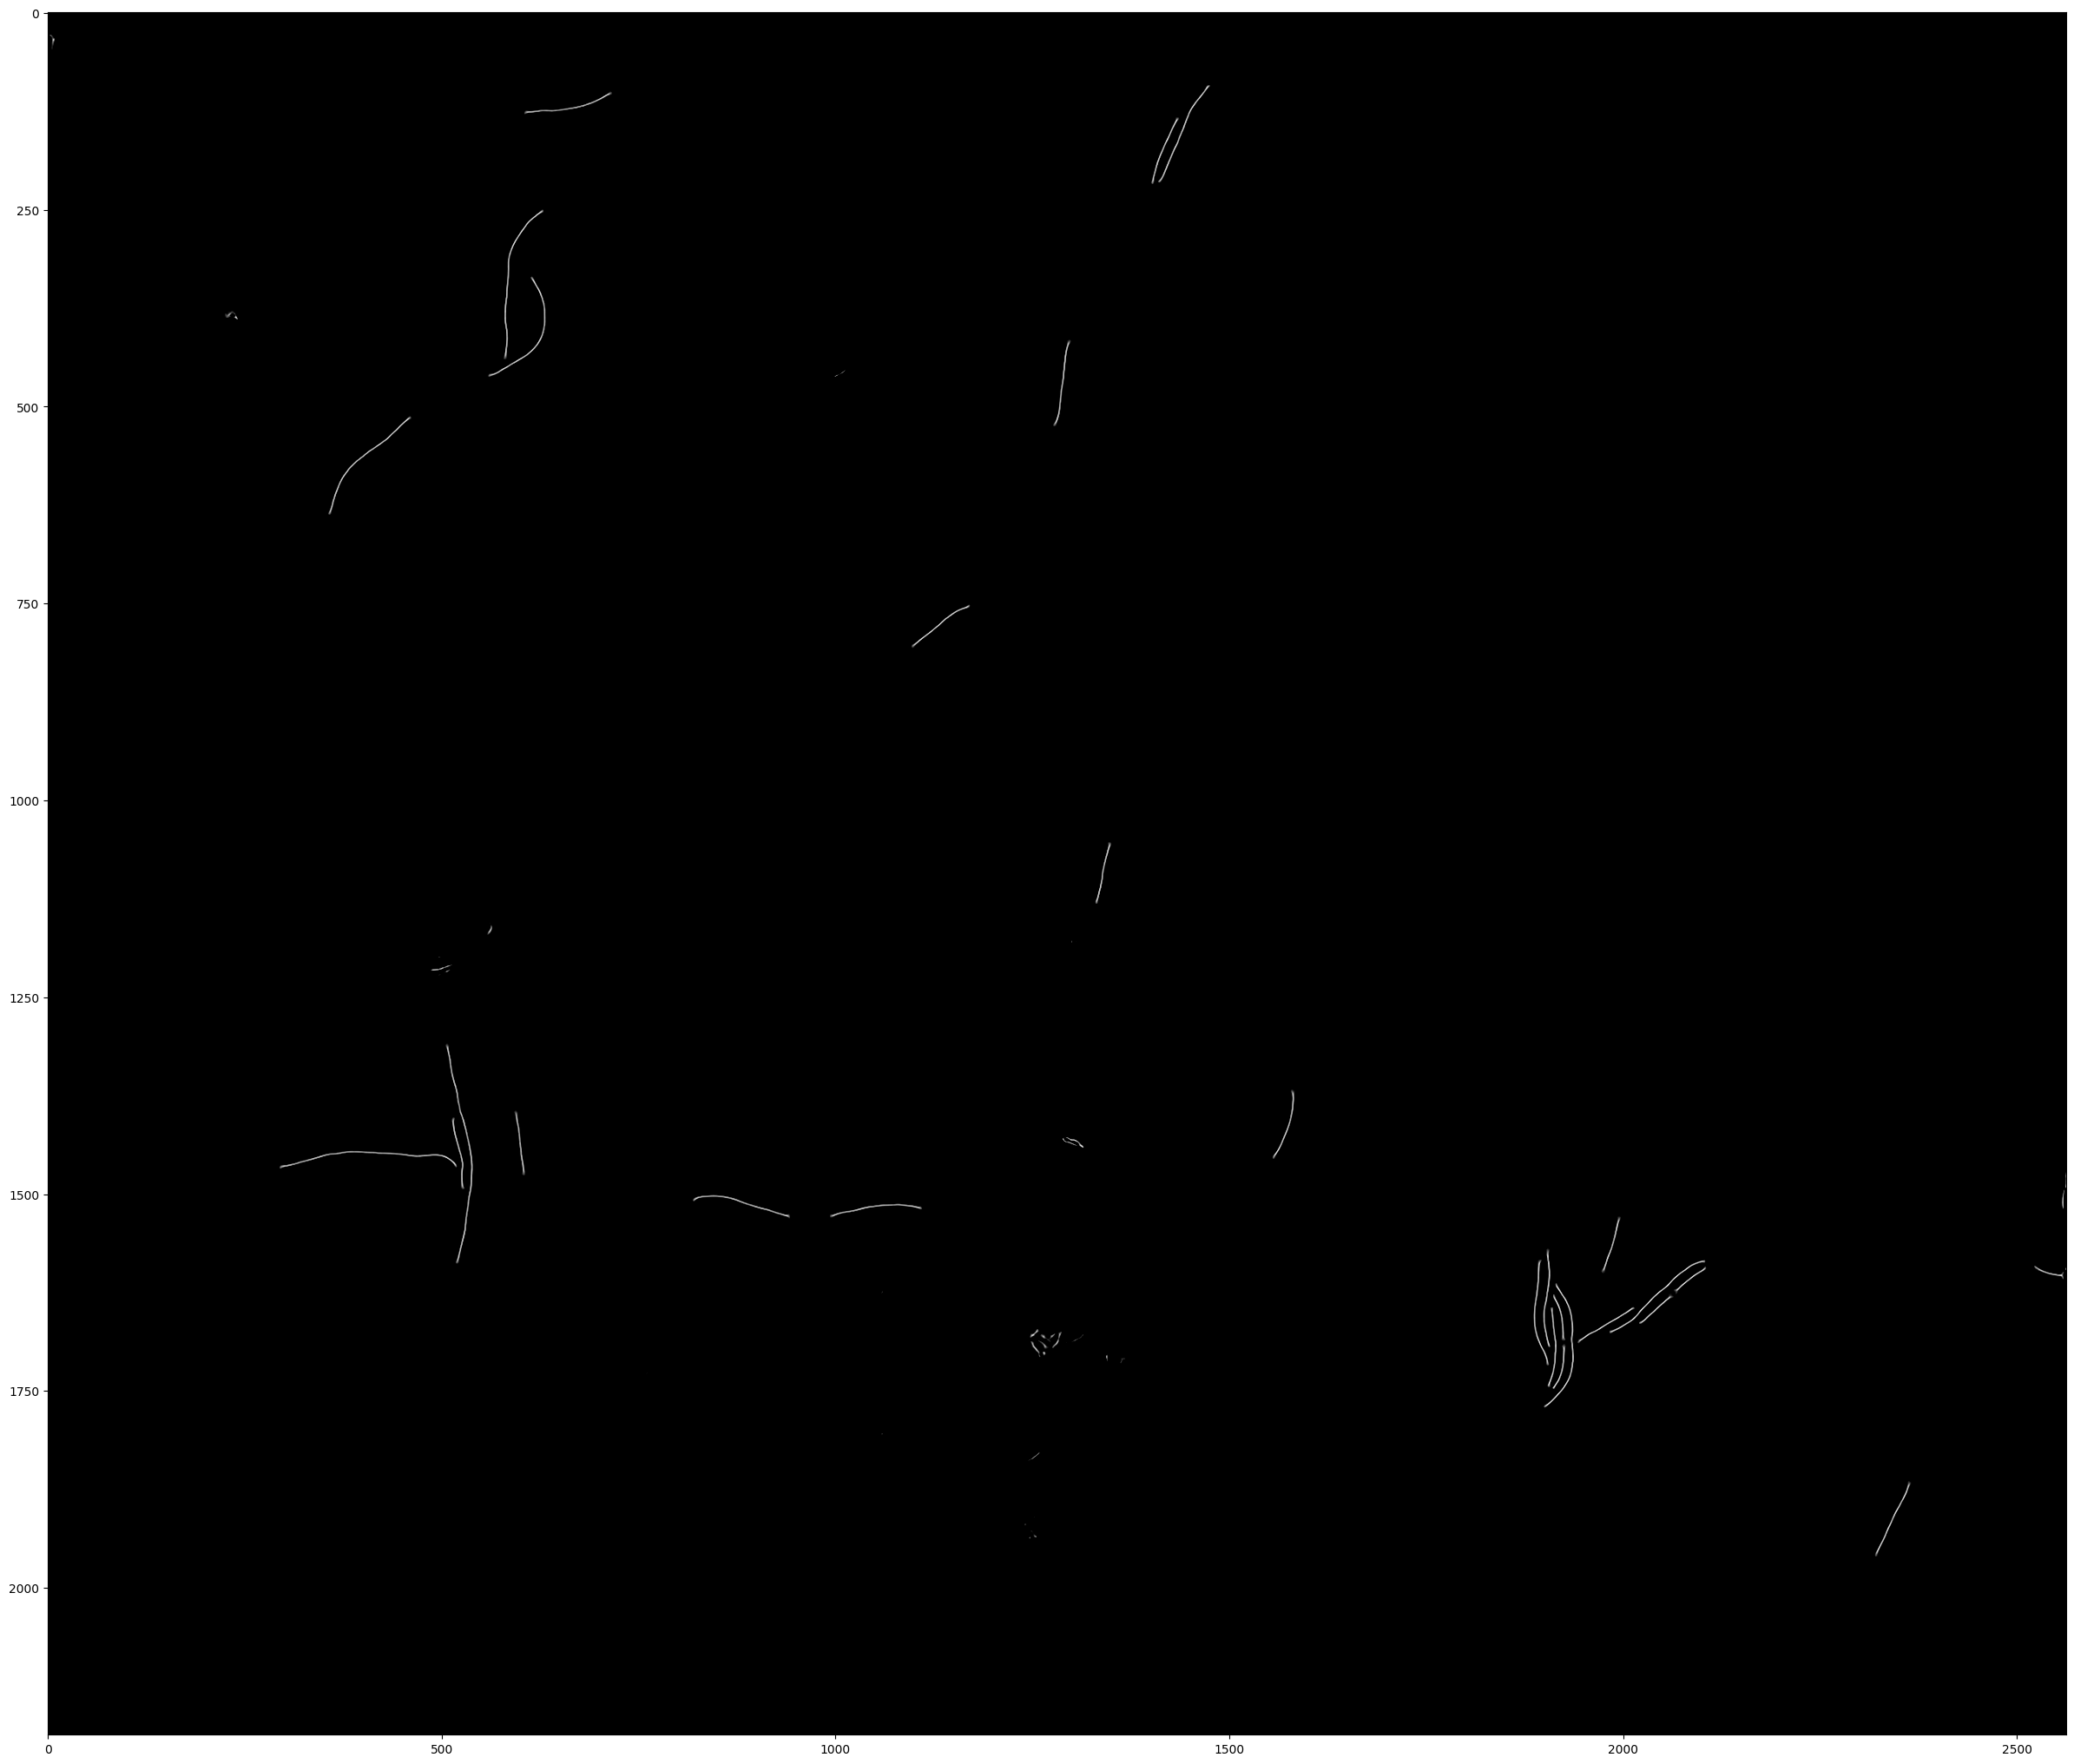

In [15]:
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys', vmax = -1)

In [16]:
masked = (regs_label == 2) & (gradient_total < -1)

In [17]:
masked


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [18]:
masked = (regs_label == 2) & (gradient_total < -1)
y = np.ma.array(gradient_total * masked)
x_center = np.mean(y[0])
y_center = np.mean(y[1])
row_indices, col_indices = np.where(y < 0)
distances = np.sqrt((row_indices - x_center)**2 + (col_indices - y_center)**2)
closest_index = np.argmin(distances)
closest_point = (row_indices[closest_index], col_indices[closest_index])

In [19]:
closest_point

(213, 1410)

In [6]:
gradient_total < -4

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [20]:
import numpy as np
dat = np.load('211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00001xy0c1_seg.npy', allow_pickle=True).item()
gradients = np.gradient(dat['flows'][-1][0])
gradientsy = np.gradient(dat['flows'][-1][1])
gradient_total = gradientsy[1] + gradients[0]

In [21]:
masked_array = gradient_total < -4

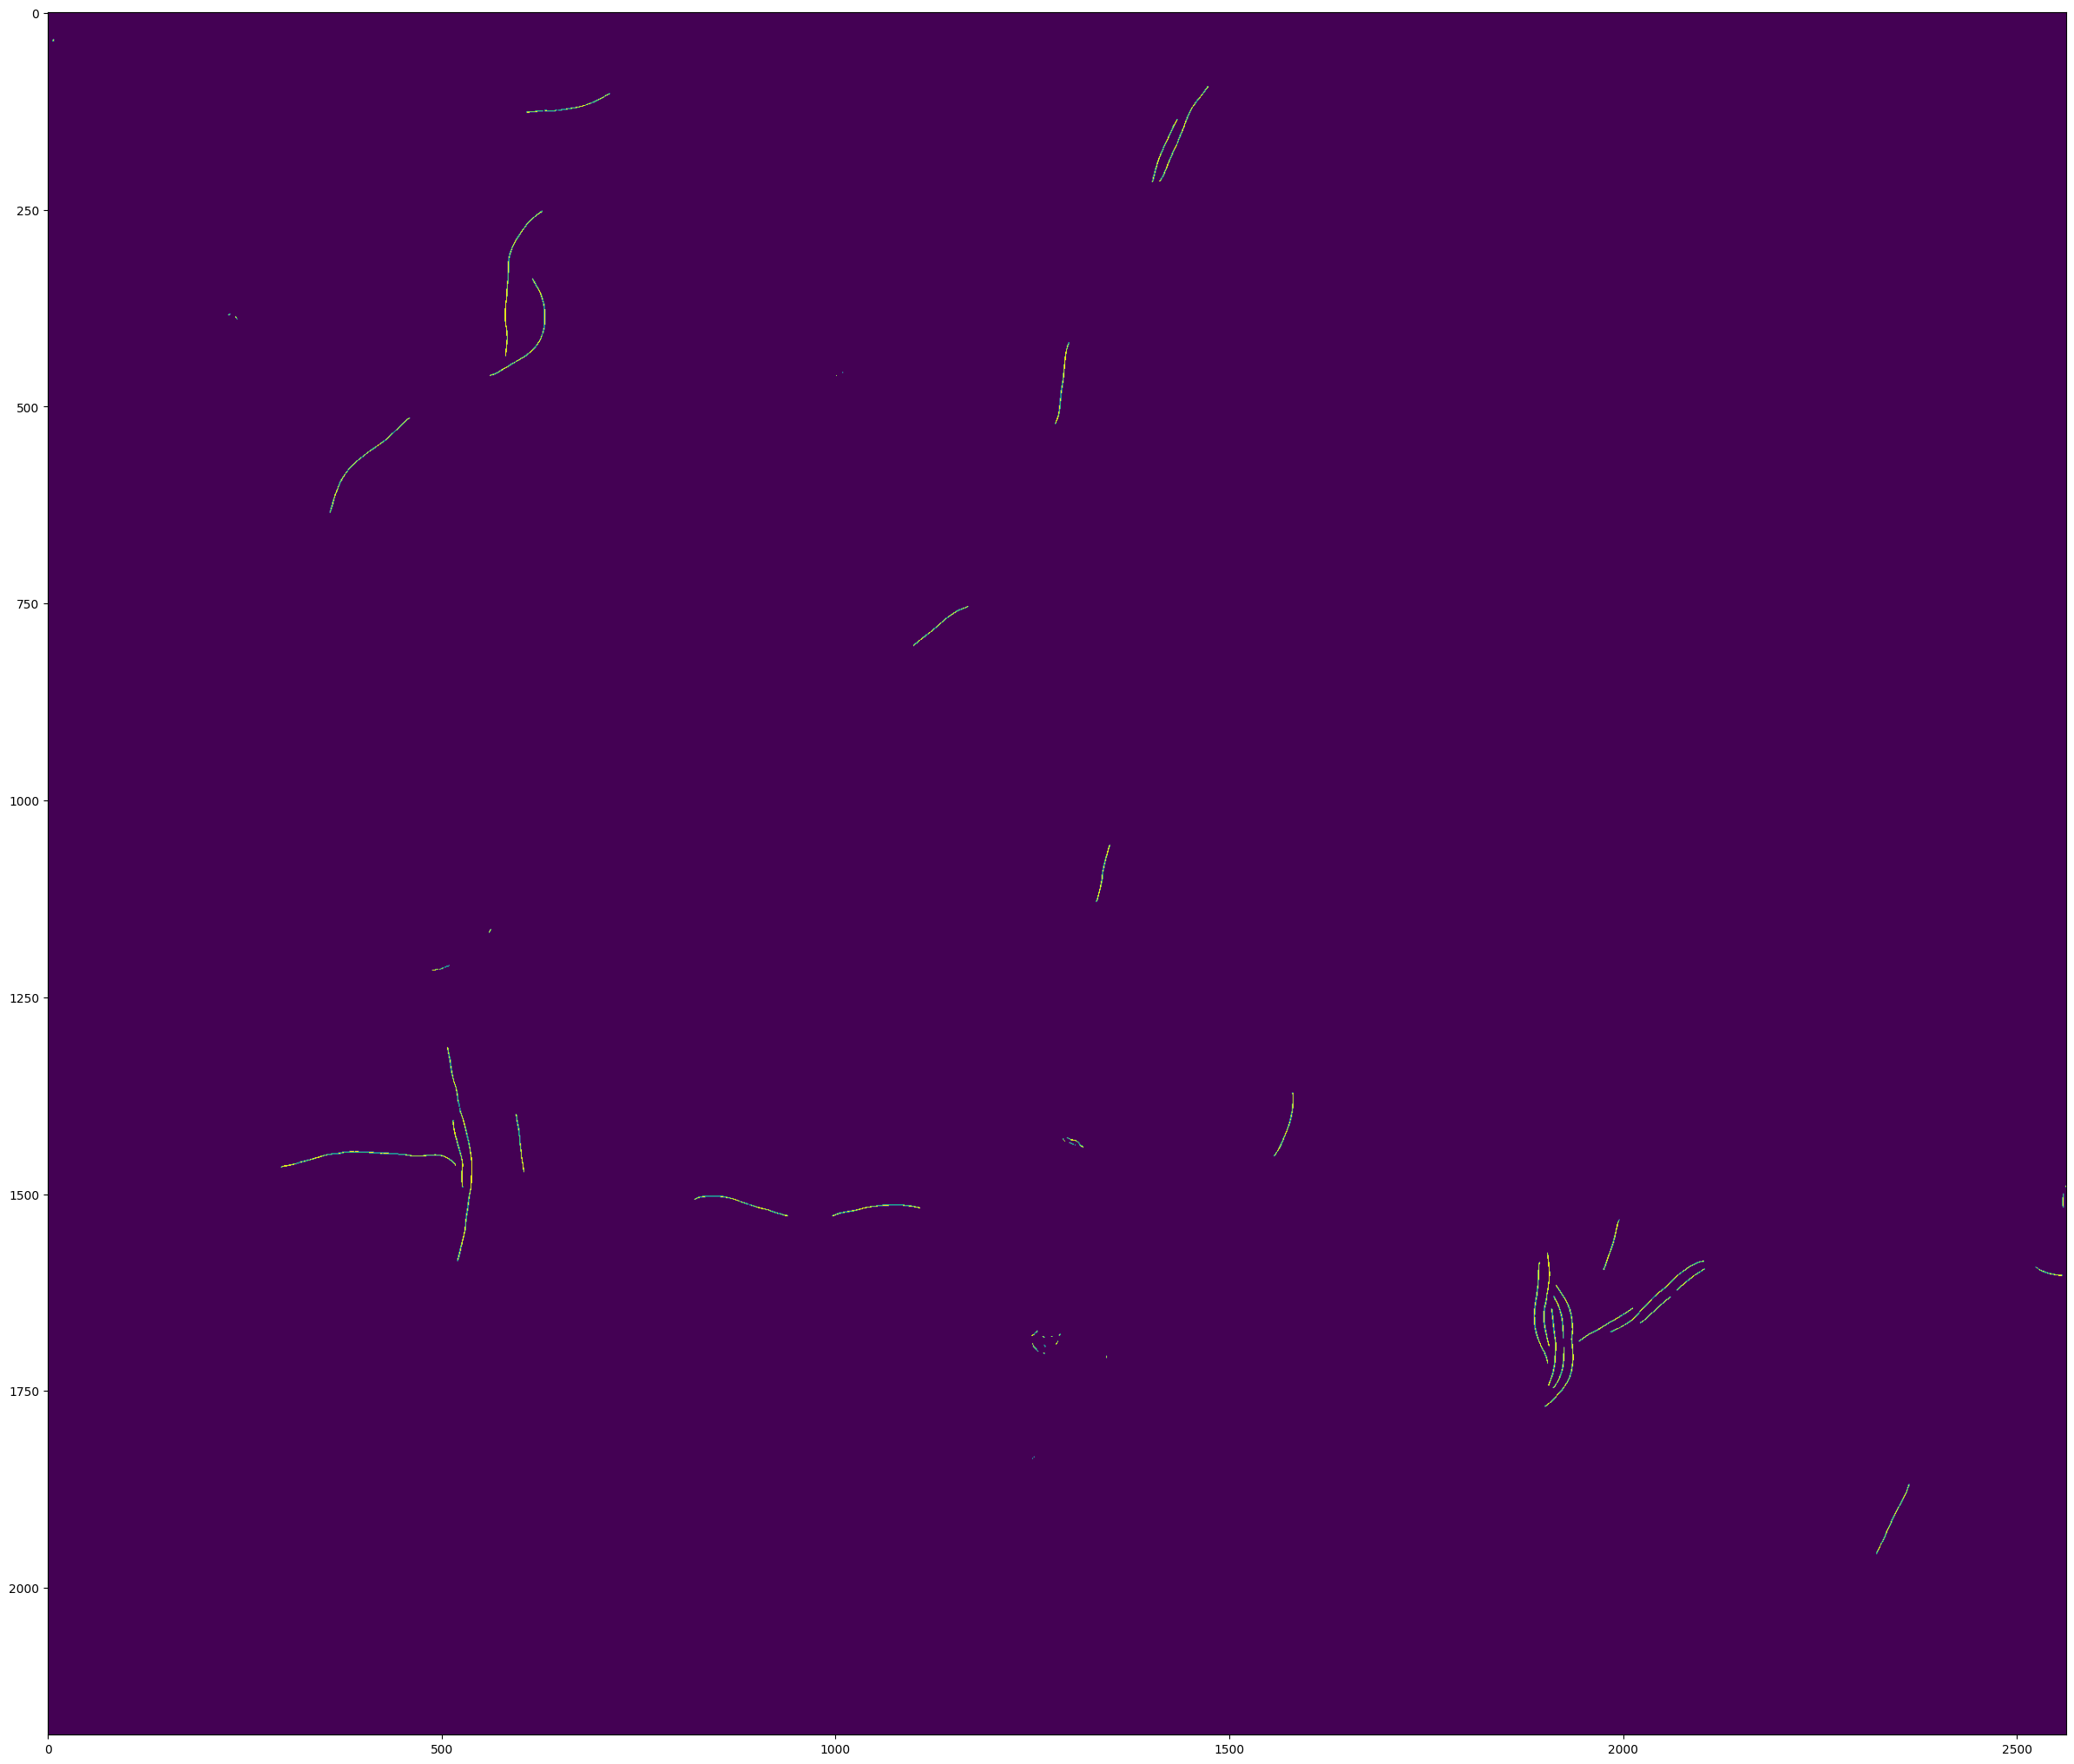

In [18]:
fig = plt.figure(figsize=(30, 30))
plt.imshow(masked_array)
plt.colorbar()

In [21]:
len(masked_array)

2187

In [22]:
masked_array[2500][2187]

IndexError: index 2500 is out of bounds for axis 0 with size 2187

In [15]:
point_set = set{213 * 10000 + 1410}
end_point = []
while point_set:
    newset = set()
    for element in set_copy:
        xx = element / 10000
        yy = element % 10000
        small_set = set([[xx-1, yy],[xx-1,yy+1],[xx-1, yy+1],[xx+1,yy],[xx+1, yy-1],[xx+1, yy-1],[xx,yy+1],[xx,yy-1]])
        flag = False
        for each in small_set:
            if(each[0] == 0) or (each[1] == 0) or (each[0] == len(masked_array)) or (each[1] == len(masked_array[1])):
                end_point.append(each)
            else
                if (masked_array[each[0]][each[1]] == True ):
                    newset.add(each)
                    flag == True
        if Flag == False:
            end_point.add(element)
        point_set.remove(element)

SyntaxError: invalid syntax (4240037653.py, line 1)

In [27]:
point_set = {(213 * 10000 + 1410)}
end_point = []
while point_set:
    newset = set()
    for element in point_set:
        xx = int(element / 10000)
        yy = element % 10000   
        small_set = set([element -1 , element +1, element -10000 +1, element + 10000+1, element +10000-1, element -10000-1, element +10000, element -10000])
        flag = False
        for each in small_set:
            if(each/10000 == 0) or (each % 10000 == 0) or (each/10000 == len(masked_array)) or (each % 10000 == len(masked_array[1])):
                end_point.append(each)
            else:
                x = int(each / 10000)
                y = each % 10000
                if (masked_array[x,y] == True ):
                    newset.add(each)
                    masked_array[x,y] = False
                    flag == True
        if flag == False:
            print(element)
            end_point.append(element)
        masked_array[xx,yy] = False
        
    point_set = newset

2131410


In [17]:
masked_array[2186,2186]

False

In [18]:
len(end_point)

189

In [ ]:
end_point = [2131410]

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys')

for element in end_point:
    print(element)
    plt.scatter(int(element / 10000), element % 10000, c='red', marker='o')

#plt.colorbar(image)
plt.show()

2131410


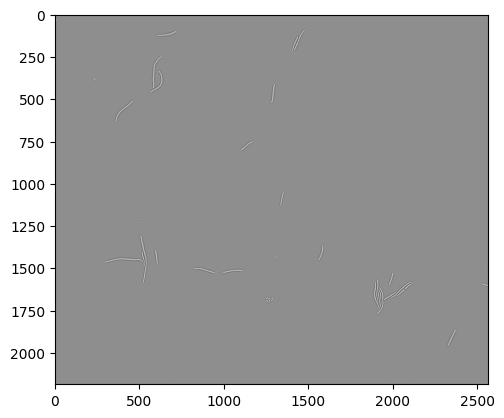

In [29]:
image = plt.imshow(gradient_total, cmap='Greys')

2131410


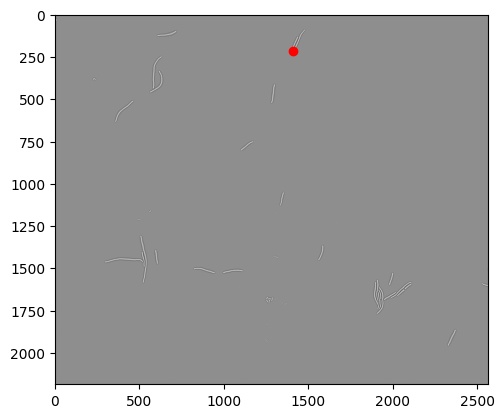

In [36]:
#fig = plt.figure(figsize=(30, 30))

image = plt.imshow(gradient_total, cmap='Greys')
for element in end_point:
    print(element)
    plt.scatter( element % 10000,int(element / 10000), c='red', marker='o')

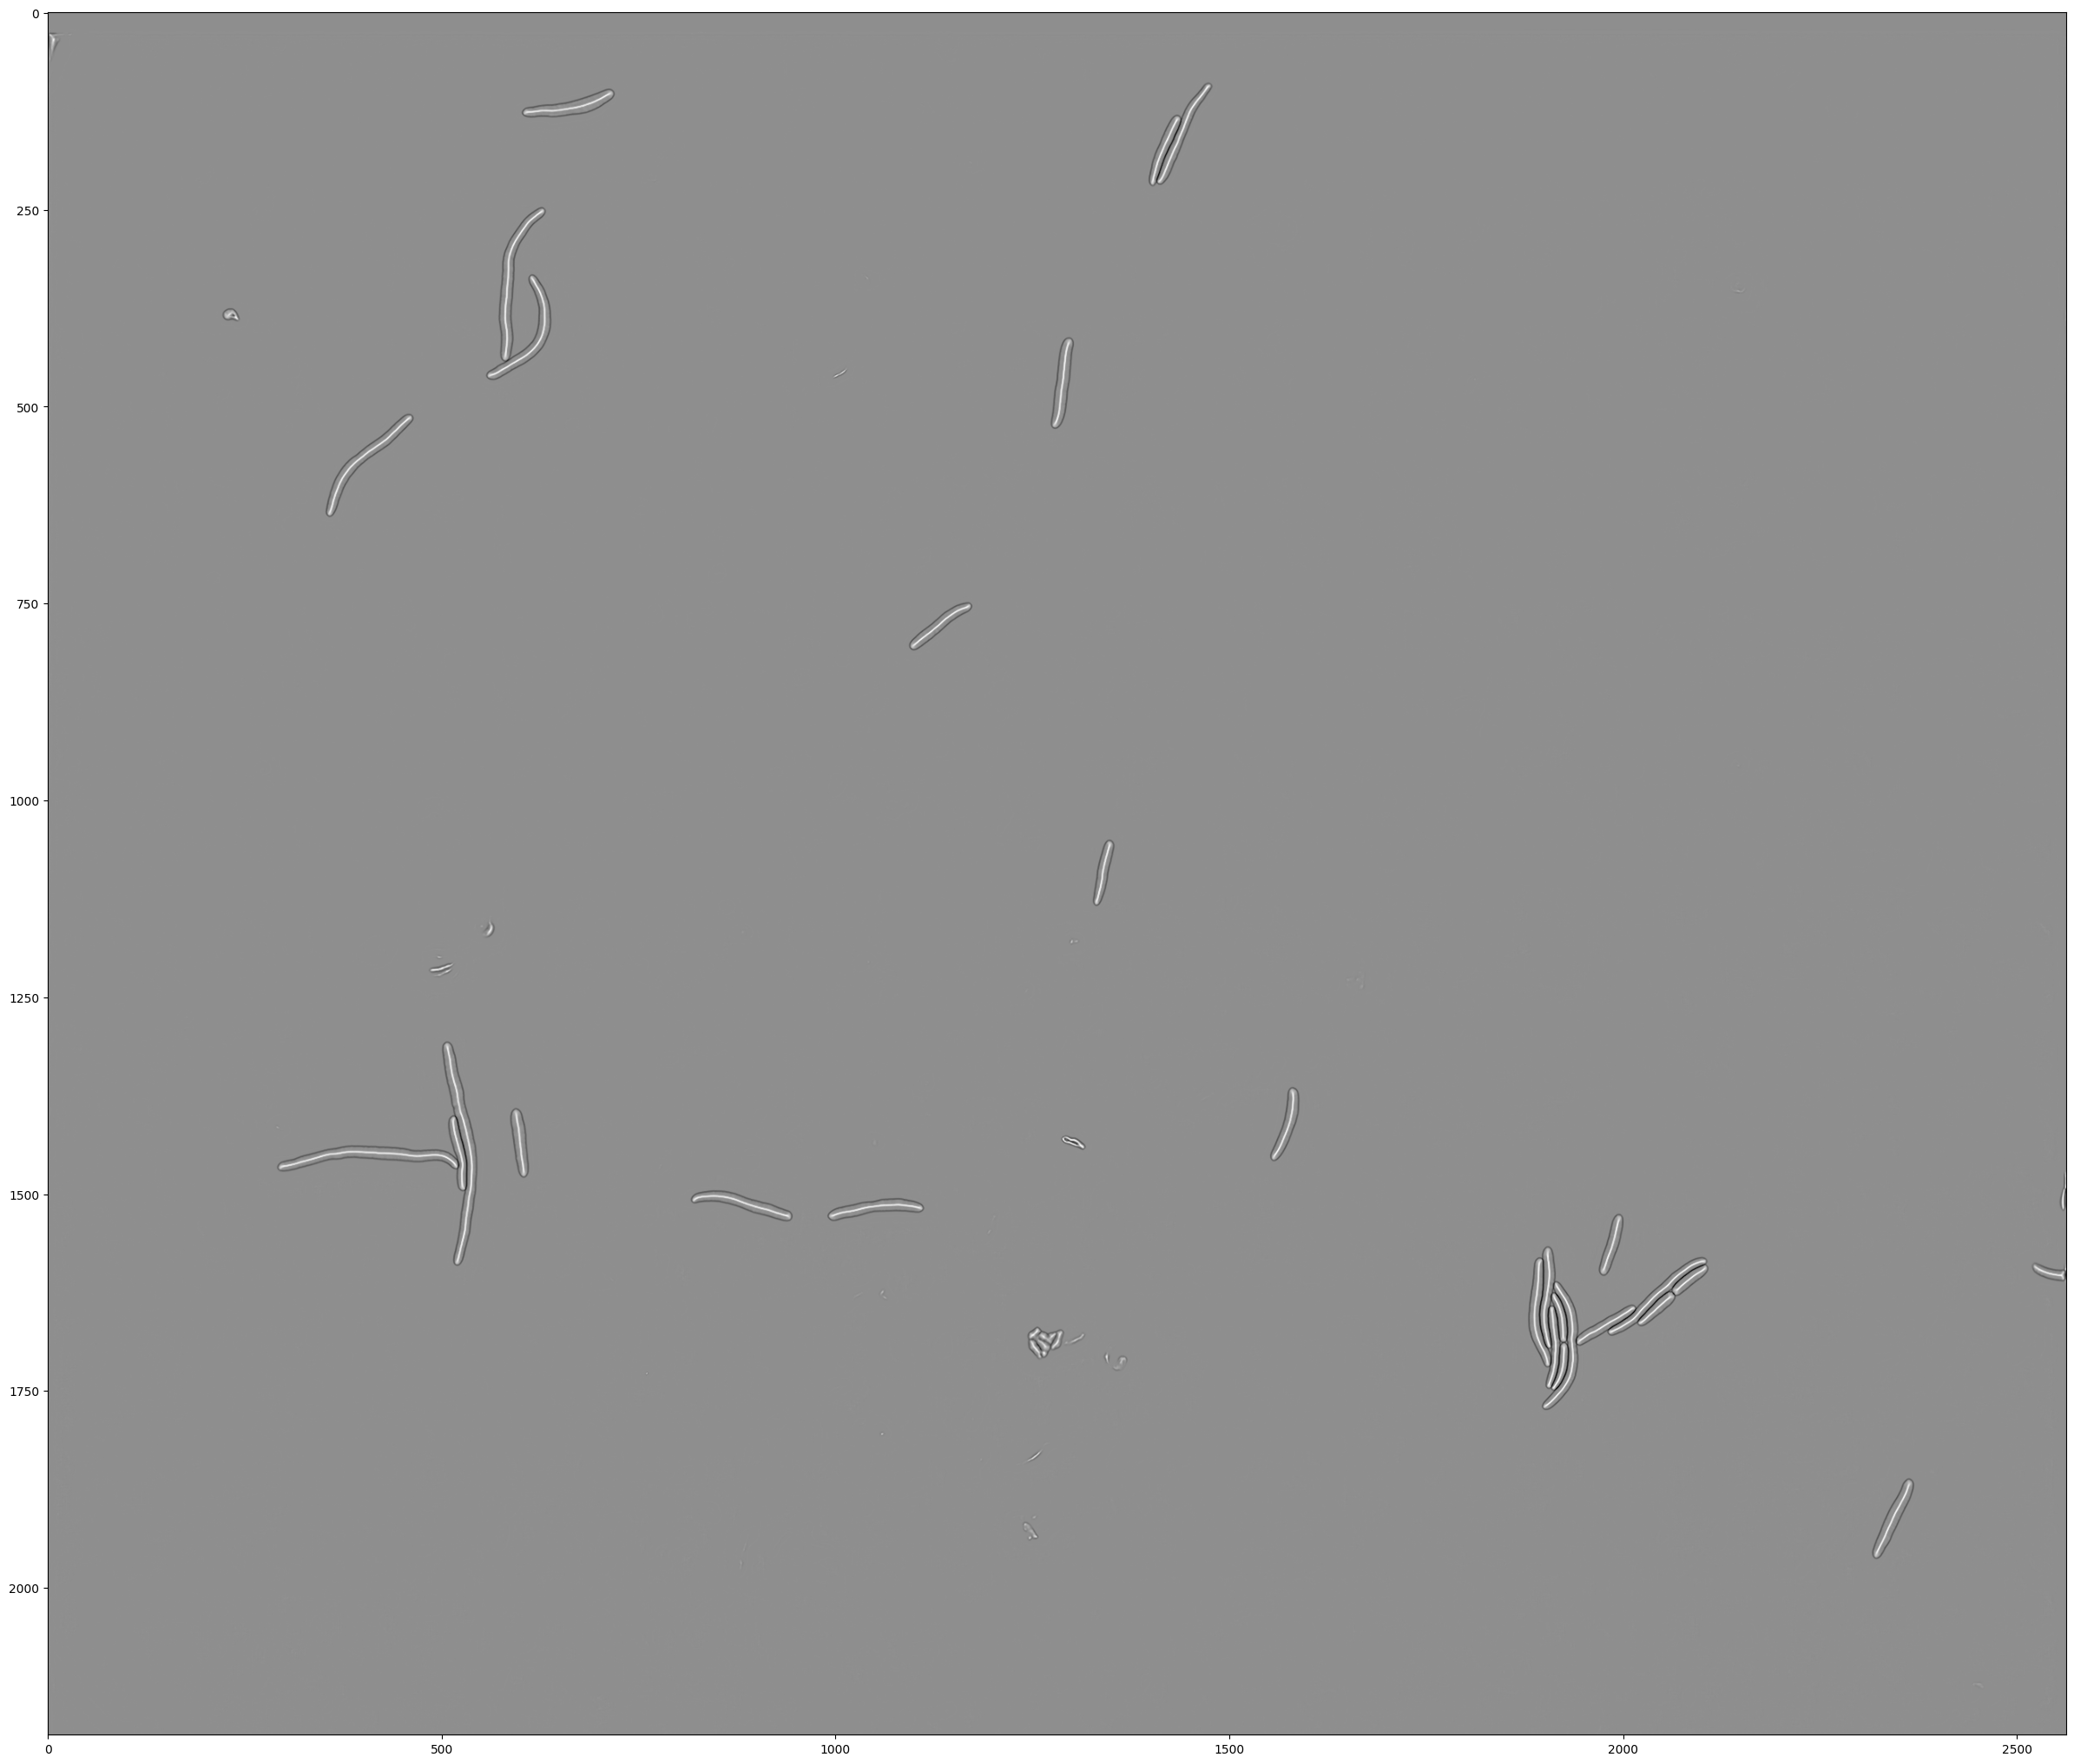

In [37]:
fig = plt.figure(figsize=(30, 30))

image = plt.imshow(gradient_total, cmap='Greys')

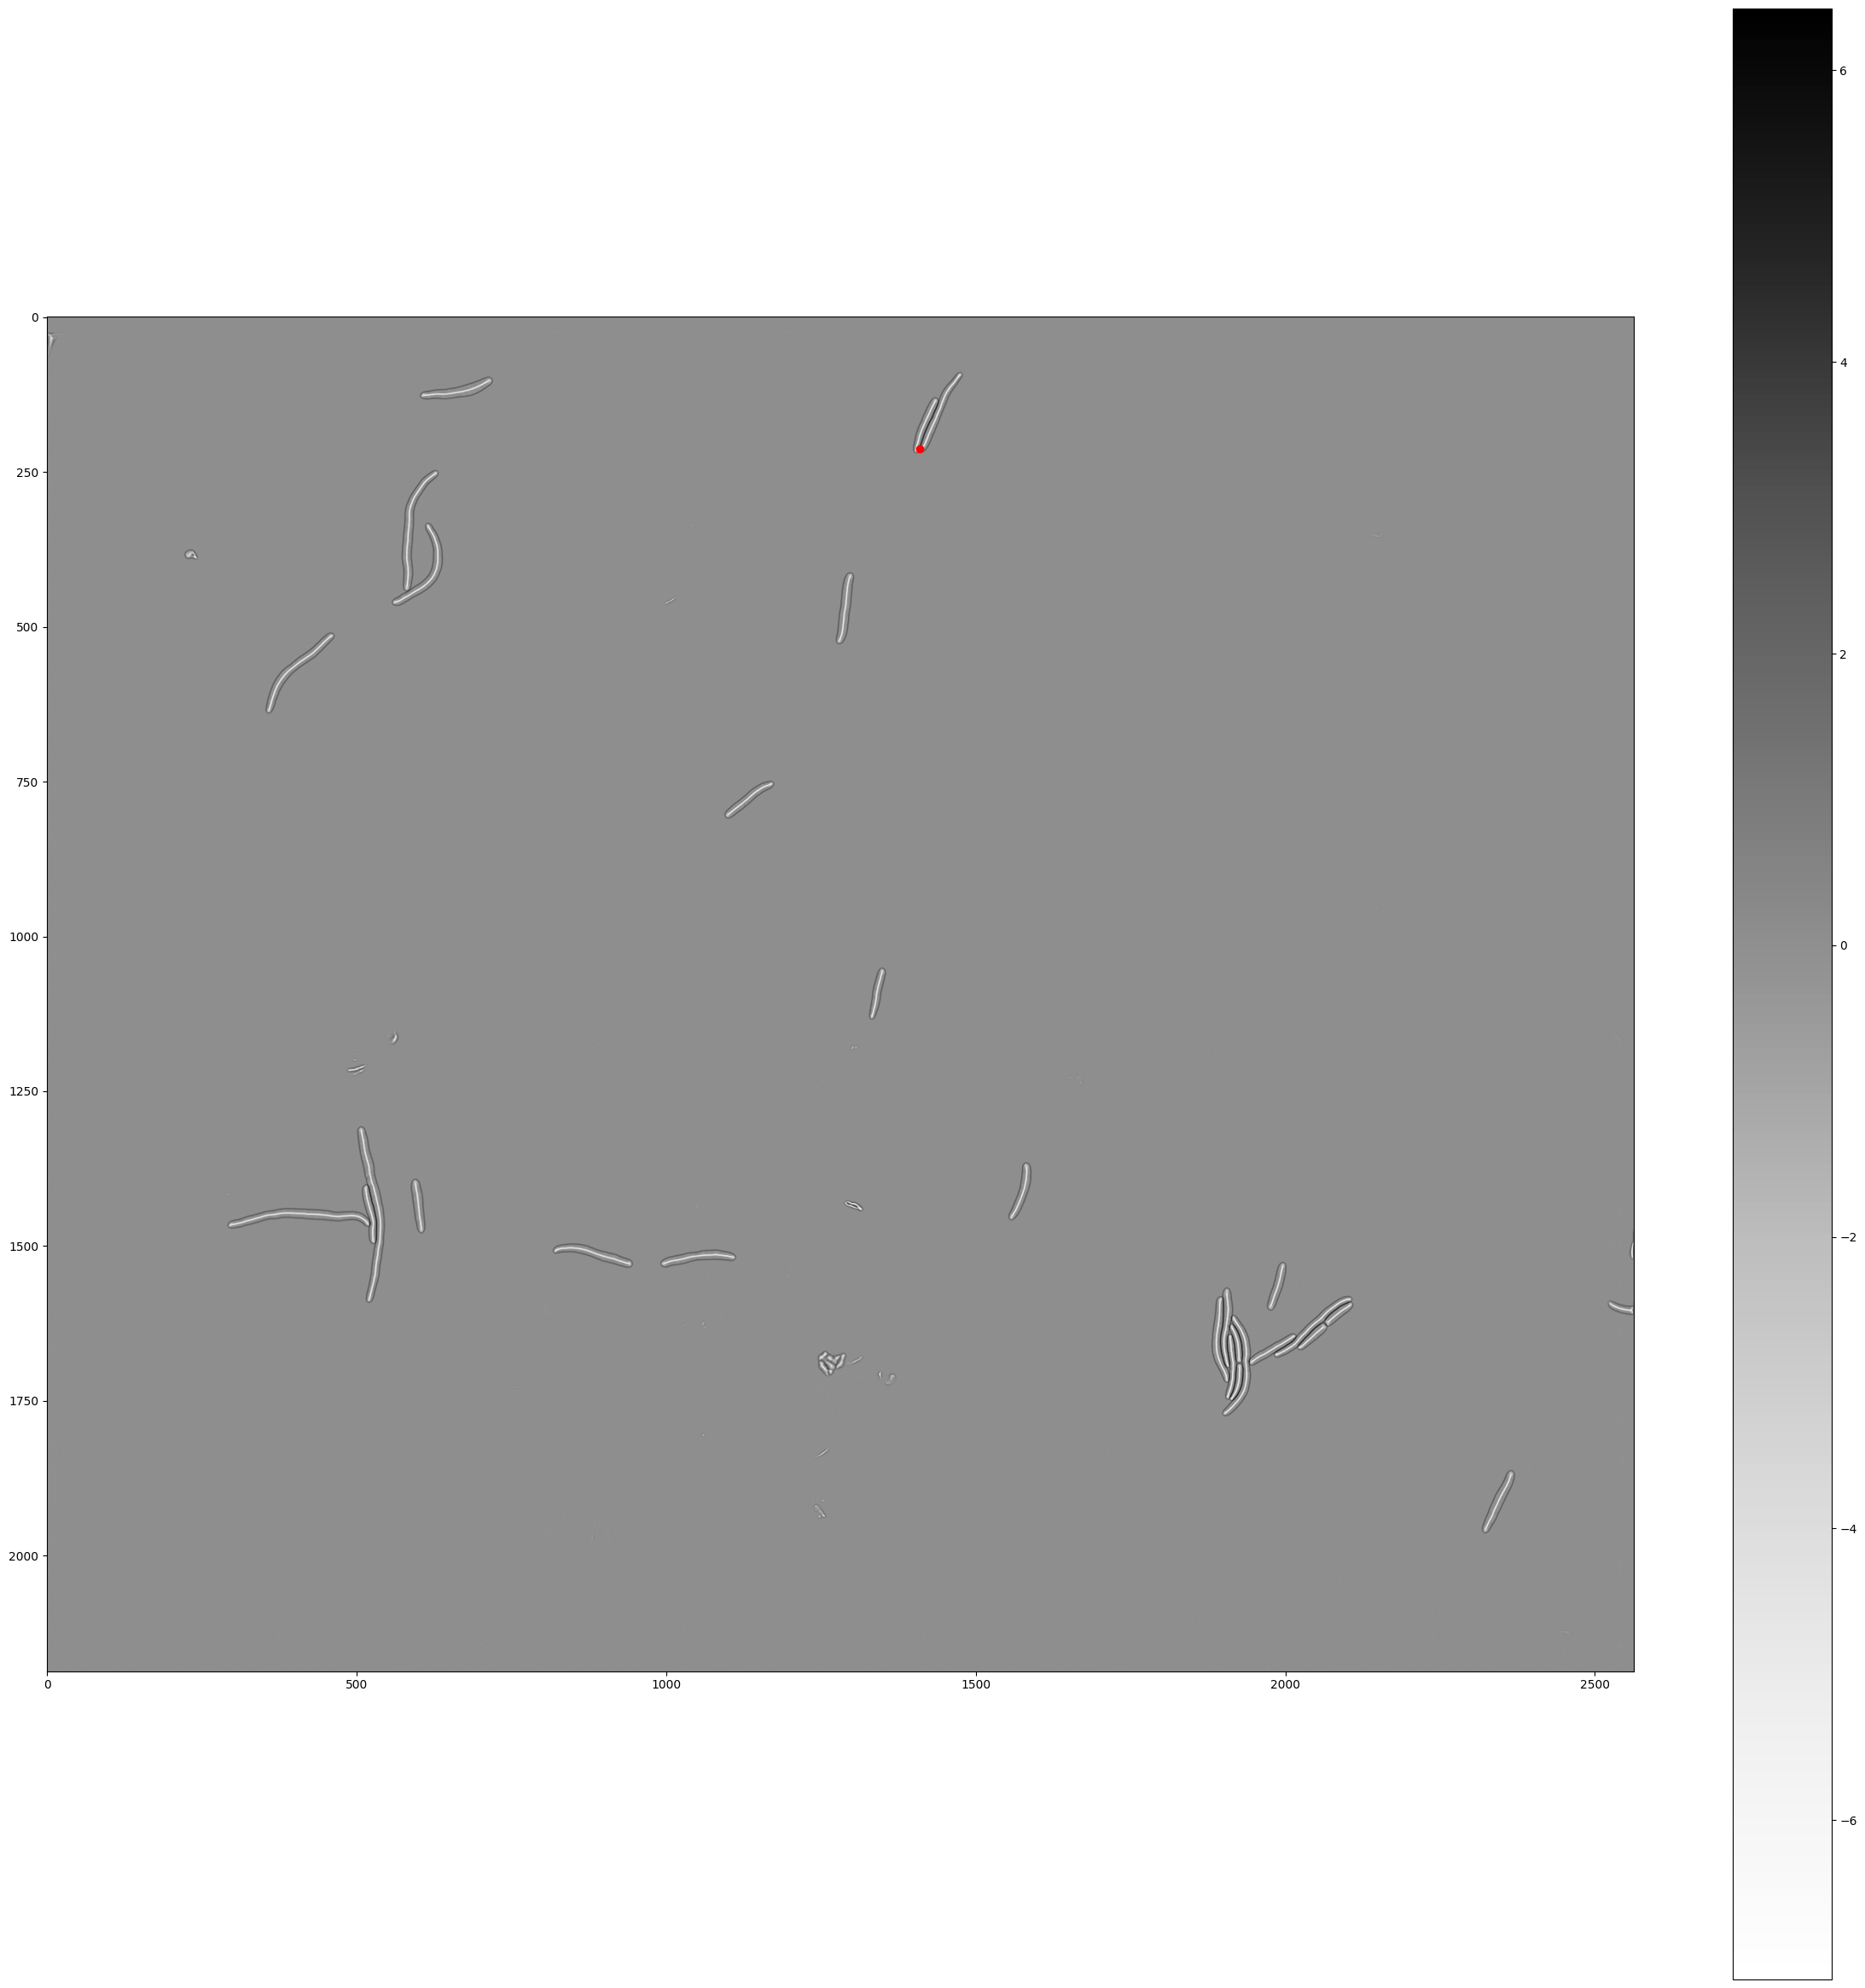

In [41]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys')
213 * 10000 + 1410

for each in end_point:
    plt.scatter( 1410,213, c='red', marker='o')
plt.colorbar(image)
plt.show()

In [ ]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys')

for i in range(42):
    print(i)
    masked = (regs_label == i) & (gradient_total < -1)
    y = np.ma.array(gradient_total * masked)
    row_indices, col_indices = np.where(y < 0)
    x_center = np.mean(row_indices)
    y_center = np.mean(col_indices)
    distances = np.sqrt((row_indices - x_center)**2 + (col_indices - y_center)**2)
    closest_index = np.argmin(distances)
    closest_point = (row_indices[closest_index], col_indices[closest_index])
    plt.scatter(closest_point[1], closest_point[0], c='red', marker='o')

plt.colorbar(image)
plt.show()